In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import mnist
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

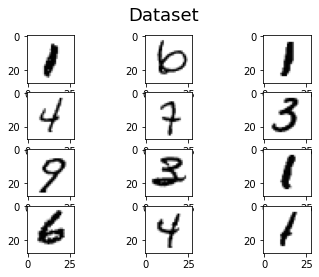

In [4]:

np.random.seed(3)
n_rows = 4
n_cols = 3
fig, ax = plt.subplots(nrows=n_rows,ncols=n_cols)
fig.suptitle("Dataset", size=18)
for i in range(n_rows):
    for j in range(n_cols):
        ax[i][j].imshow(x_train[np.random.randint(0,6000)], cmap= 'binary')

In [5]:
def preprocess(dataset):
    dataset = (dataset - np.mean(dataset))/255
    dataset = dataset.reshape(-1,28,28,1)
    return dataset
x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [6]:
def onehot(labels):
    return np.array([[float(i==data) for i in range(10)] for data in labels])
y_train = onehot(y_train)
y_test = onehot(y_test)

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, padding='SAME', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(padding = 'SAME'))
model.add(Conv2D(filters=32, kernel_size=5, padding='SAME', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())

In [8]:
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 47s 94ms/step - loss: 0.1865 - accuracy: 0.9435 - val_loss: 0.0528 - val_accuracy: 0.9812
Epoch 2/10
469/469 [==============================] - 45s 97ms/step - loss: 0.0564 - accuracy: 0.9819 - val_loss: 0.0344 - val_accuracy: 0.9884
Epoch 3/10
469/469 [==============================] - 45s 95ms/step - loss: 0.0412 - accuracy: 0.9867 - val_loss: 0.0287 - val_accuracy: 0.9899
Epoch 4/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0265 - val_accuracy: 0.9907
Epoch 5/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0247 - val_accuracy: 0.9919
Epoch 6/10
469/469 [==============================] - 47s 99ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0274 - val_accuracy: 0.9903
Epoch 7/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0254 - val_accuracy:

In [11]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 3s 10ms/step - loss: 0.0208 - accuracy: 0.9938


[0.02083805948495865, 0.9937999844551086]

[]

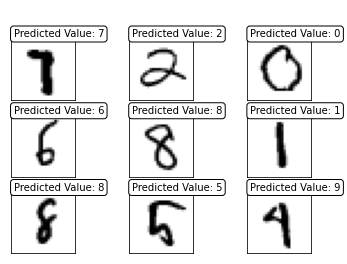

In [25]:
from turtle import color


np.random.seed(5)
n_rows = 3
n_cols = 3
fig, ax = plt.subplots(nrows=n_rows,ncols=n_cols)
fig.suptitle(" Predictions \n", size=20, color= "white")
ec = (0, 0, 0)
fc = (1, 1, 1)
for i in range(n_rows):
    for j in range(n_cols):
        k = np.random.randint(0,6000)
        ax[i][j].imshow(x_test[k].reshape((28,28)), cmap='binary')
        temp = np.argmax(model.predict(np.expand_dims(x_test[k], axis=0)))
        ax[i][j].text(s="Predicted Value: {}".format(temp), x=0.75, y=0,
                      bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])